# Orbital Mechanics: Kepler's Laws of Planetary Motion

## Introduction

Johannes Kepler's three laws of planetary motion, formulated in the early 17th century, represent one of the most significant achievements in the history of astronomy. These empirical laws, later explained by Newton's theory of gravitation, describe the motion of planets around the Sun and, more generally, the motion of any two bodies under mutual gravitational attraction.

## Kepler's Three Laws

### First Law (Law of Ellipses)

The orbit of each planet is an ellipse with the Sun at one focus.

The equation of an ellipse in polar coordinates, with the focus at the origin, is:

$$r = \frac{a(1 - e^2)}{1 + e\cos\theta}$$

where:
- $r$ is the radial distance from the focus (Sun)
- $a$ is the semi-major axis
- $e$ is the eccentricity ($0 \leq e < 1$ for ellipses)
- $\theta$ is the true anomaly (angle from perihelion)

The semi-latus rectum is defined as:
$$\ell = a(1 - e^2)$$

### Second Law (Law of Equal Areas)

A line joining a planet and the Sun sweeps out equal areas during equal intervals of time.

This implies conservation of angular momentum:
$$L = mr^2\dot{\theta} = \text{constant}$$

The areal velocity (area swept per unit time) is:
$$\frac{dA}{dt} = \frac{1}{2}r^2\dot{\theta} = \frac{L}{2m} = \text{constant}$$

### Third Law (Law of Periods)

The square of the orbital period of a planet is proportional to the cube of the semi-major axis of its orbit.

$$T^2 = \frac{4\pi^2}{GM}a^3$$

or equivalently:

$$\frac{T^2}{a^3} = \frac{4\pi^2}{GM} = \text{constant}$$

where:
- $T$ is the orbital period
- $G$ is the gravitational constant
- $M$ is the mass of the central body (Sun)

## Orbital Energy and Vis-Viva Equation

The total mechanical energy of an orbiting body is:
$$E = \frac{1}{2}mv^2 - \frac{GMm}{r} = -\frac{GMm}{2a}$$

This leads to the vis-viva equation:
$$v^2 = GM\left(\frac{2}{r} - \frac{1}{a}\right)$$

## Equations of Motion

The gravitational force on a body of mass $m$ orbiting a central mass $M$ is:
$$\mathbf{F} = -\frac{GMm}{r^2}\hat{r}$$

In Cartesian coordinates, the equations of motion are:
$$\ddot{x} = -\frac{GM}{r^3}x$$
$$\ddot{y} = -\frac{GM}{r^3}y$$

where $r = \sqrt{x^2 + y^2}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.patches import Wedge
from matplotlib.collections import PatchCollection

# Set up publication-quality plot parameters
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'legend.fontsize': 9,
    'figure.figsize': (14, 10),
    'figure.dpi': 100
})

In [2]:
# Physical constants (using normalized units where GM = 1)
GM = 1.0  # Gravitational parameter

def orbital_dynamics(t, state, GM):
    """
    Compute derivatives for orbital motion.
    
    Parameters:
    -----------
    t : float
        Time (not used explicitly, but required by solver)
    state : array
        [x, y, vx, vy] - position and velocity components
    GM : float
        Gravitational parameter
        
    Returns:
    --------
    derivatives : array
        [vx, vy, ax, ay] - velocity and acceleration components
    """
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    
    # Gravitational acceleration
    ax = -GM * x / r**3
    ay = -GM * y / r**3
    
    return [vx, vy, ax, ay]

def compute_orbital_elements(state, GM):
    """
    Compute orbital elements from state vector.
    
    Parameters:
    -----------
    state : array
        [x, y, vx, vy]
    GM : float
        Gravitational parameter
        
    Returns:
    --------
    a : float - semi-major axis
    e : float - eccentricity
    T : float - orbital period
    """
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    v = np.sqrt(vx**2 + vy**2)
    
    # Specific orbital energy
    energy = 0.5 * v**2 - GM / r
    
    # Semi-major axis from vis-viva equation
    a = -GM / (2 * energy)
    
    # Angular momentum
    h = x * vy - y * vx
    
    # Eccentricity
    e = np.sqrt(1 + 2 * energy * h**2 / GM**2)
    
    # Orbital period (Kepler's third law)
    T = 2 * np.pi * np.sqrt(a**3 / GM)
    
    return a, e, T

def compute_area_swept(x, y):
    """
    Compute cumulative area swept by radius vector.
    Uses the shoelace formula for triangular areas.
    """
    areas = np.zeros(len(x))
    for i in range(1, len(x)):
        # Area of triangle formed by origin and two consecutive points
        dA = 0.5 * abs(x[i-1] * y[i] - x[i] * y[i-1])
        areas[i] = areas[i-1] + dA
    return areas

In [3]:
# Define initial conditions for an elliptical orbit
# Starting at perihelion (closest approach)
a = 1.0      # Semi-major axis
e = 0.6      # Eccentricity (moderately elliptical orbit)

# At perihelion: r = a(1-e), v = sqrt(GM(1+e)/(a(1-e)))
r_perihelion = a * (1 - e)
v_perihelion = np.sqrt(GM * (1 + e) / (a * (1 - e)))

# Initial state: starting at perihelion on positive x-axis
x0 = r_perihelion
y0 = 0.0
vx0 = 0.0
vy0 = v_perihelion

initial_state = [x0, y0, vx0, vy0]

# Compute orbital period
a_calc, e_calc, T = compute_orbital_elements(initial_state, GM)
print(f"Orbital Elements:")
print(f"  Semi-major axis: a = {a_calc:.4f}")
print(f"  Eccentricity: e = {e_calc:.4f}")
print(f"  Orbital period: T = {T:.4f}")
print(f"  Perihelion distance: r_p = {r_perihelion:.4f}")
print(f"  Aphelion distance: r_a = {a*(1+e):.4f}")

Orbital Elements:
  Semi-major axis: a = 1.0000
  Eccentricity: e = 0.6000
  Orbital period: T = 6.2832
  Perihelion distance: r_p = 0.4000
  Aphelion distance: r_a = 1.6000


In [4]:
# Integrate the orbit for one complete period
t_span = (0, T)
t_eval = np.linspace(0, T, 1000)

solution = solve_ivp(
    orbital_dynamics,
    t_span,
    initial_state,
    args=(GM,),
    t_eval=t_eval,
    method='DOP853',  # High-order method for accuracy
    rtol=1e-10,
    atol=1e-12
)

# Extract solution
t = solution.t
x = solution.y[0]
y = solution.y[1]
vx = solution.y[2]
vy = solution.y[3]

# Compute derived quantities
r = np.sqrt(x**2 + y**2)
v = np.sqrt(vx**2 + vy**2)
theta = np.arctan2(y, x)

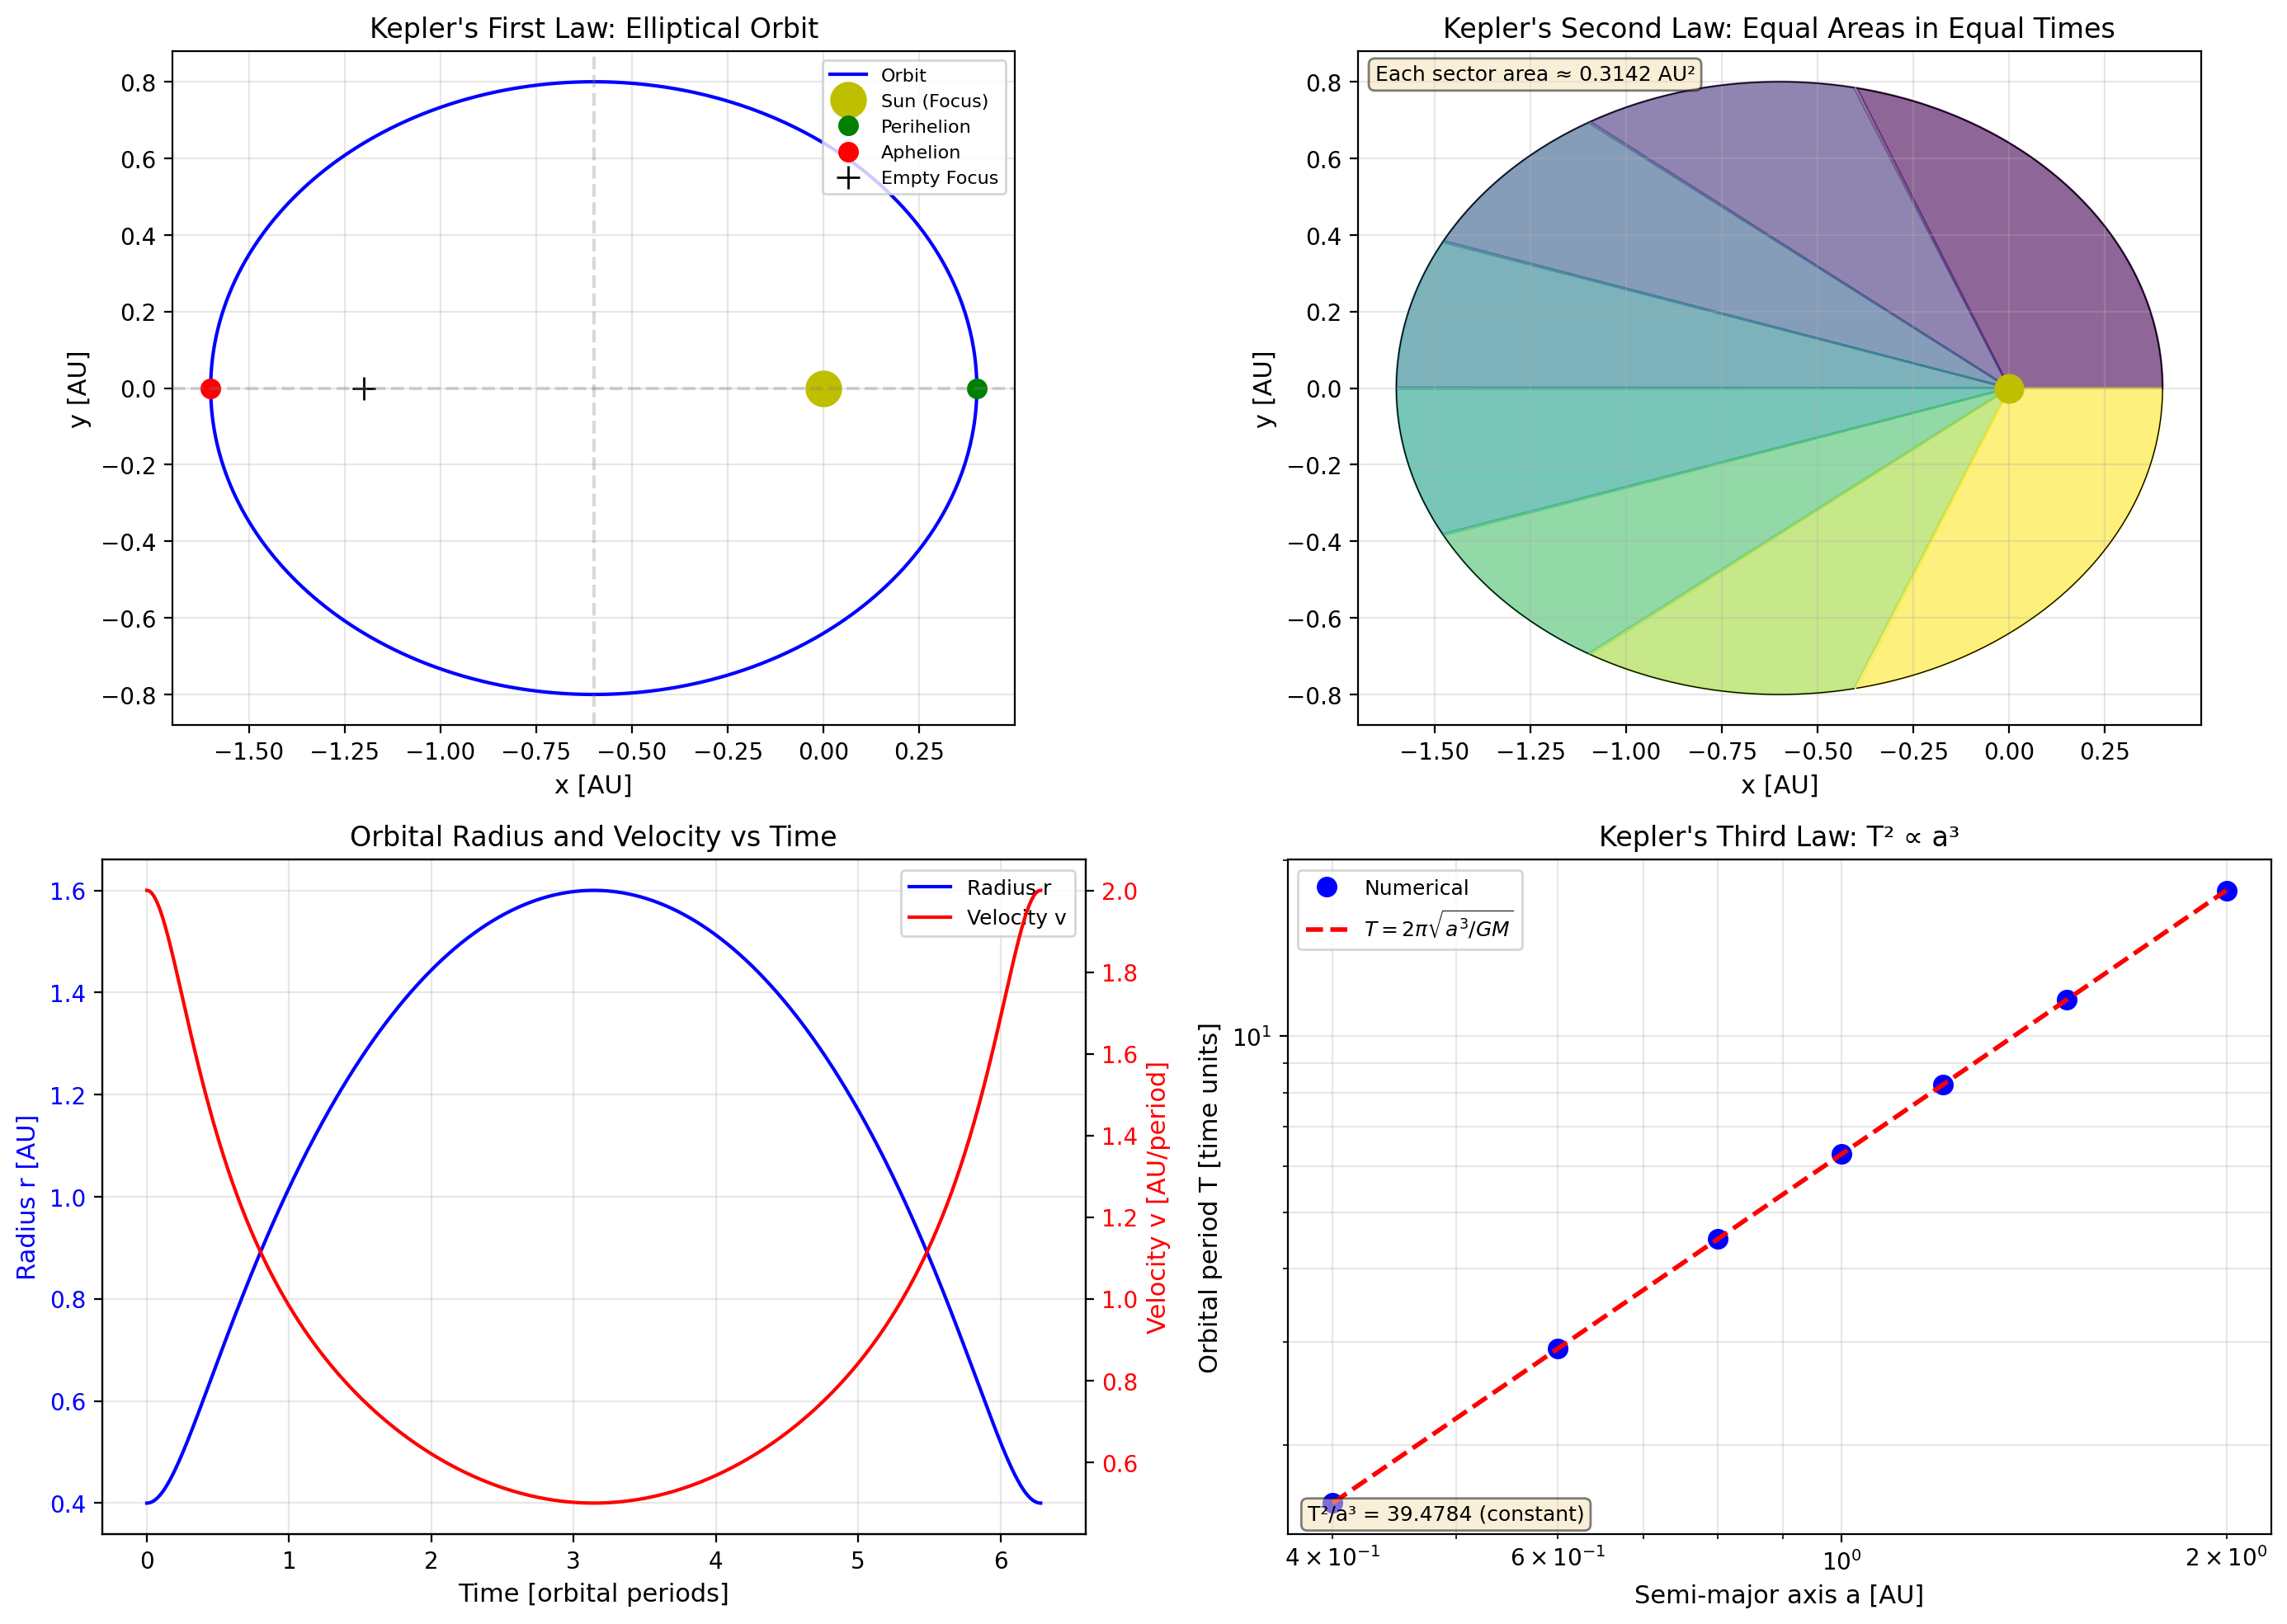


Plot saved to 'plot.png'


In [5]:
# Create comprehensive figure demonstrating Kepler's laws
fig = plt.figure(figsize=(14, 10))

# Plot 1: Orbital trajectory (First Law)
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(x, y, 'b-', linewidth=1.5, label='Orbit')
ax1.plot(0, 0, 'yo', markersize=15, label='Sun (Focus)')
ax1.plot(x[0], y[0], 'go', markersize=8, label='Perihelion')
ax1.plot(x[len(x)//2], y[len(y)//2], 'ro', markersize=8, label='Aphelion')

# Mark the other focus
c = a * e  # Distance from center to focus
ax1.plot(-2*c, 0, 'k+', markersize=10, label='Empty Focus')

# Draw semi-major and semi-minor axes
b = a * np.sqrt(1 - e**2)  # Semi-minor axis
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
ax1.axvline(x=-c, color='gray', linestyle='--', alpha=0.3)

ax1.set_xlabel('x [AU]')
ax1.set_ylabel('y [AU]')
ax1.set_title("Kepler's First Law: Elliptical Orbit")
ax1.legend(loc='upper right', fontsize=8)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

# Plot 2: Equal areas in equal times (Second Law)
ax2 = fig.add_subplot(2, 2, 2)

# Divide orbit into equal time intervals and show swept areas
n_sectors = 8
colors = plt.cm.viridis(np.linspace(0, 1, n_sectors))

for i in range(n_sectors):
    idx_start = i * len(t) // n_sectors
    idx_end = (i + 1) * len(t) // n_sectors
    
    # Create sector
    sector_x = np.concatenate([[0], x[idx_start:idx_end], [0]])
    sector_y = np.concatenate([[0], y[idx_start:idx_end], [0]])
    
    ax2.fill(sector_x, sector_y, color=colors[i], alpha=0.6)
    ax2.plot(x[idx_start:idx_end], y[idx_start:idx_end], 'k-', linewidth=0.5)

ax2.plot(0, 0, 'yo', markersize=12)
ax2.set_xlabel('x [AU]')
ax2.set_ylabel('y [AU]')
ax2.set_title("Kepler's Second Law: Equal Areas in Equal Times")
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)

# Compute and display areas
areas = compute_area_swept(x, y)
total_area = areas[-1]
sector_area = total_area / n_sectors
ax2.text(0.02, 0.98, f'Each sector area ≈ {sector_area:.4f} AU²',
         transform=ax2.transAxes, fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 3: Orbital velocity and radius vs time
ax3 = fig.add_subplot(2, 2, 3)
ax3_twin = ax3.twinx()

line1 = ax3.plot(t, r, 'b-', linewidth=1.5, label='Radius r')
line2 = ax3_twin.plot(t, v, 'r-', linewidth=1.5, label='Velocity v')

ax3.set_xlabel('Time [orbital periods]')
ax3.set_ylabel('Radius r [AU]', color='b')
ax3_twin.set_ylabel('Velocity v [AU/period]', color='r')
ax3.tick_params(axis='y', labelcolor='b')
ax3_twin.tick_params(axis='y', labelcolor='r')

# Combined legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax3.legend(lines, labels, loc='upper right')

ax3.set_title('Orbital Radius and Velocity vs Time')
ax3.grid(True, alpha=0.3)

# Plot 4: Kepler's Third Law verification with multiple orbits
ax4 = fig.add_subplot(2, 2, 4)

# Simulate orbits with different semi-major axes
a_values = np.array([0.4, 0.6, 0.8, 1.0, 1.2, 1.5, 2.0])
T_values = []
T_theoretical = 2 * np.pi * np.sqrt(a_values**3 / GM)

for a_test in a_values:
    r_p_test = a_test * (1 - e)
    v_p_test = np.sqrt(GM * (1 + e) / (a_test * (1 - e)))
    test_state = [r_p_test, 0, 0, v_p_test]
    _, _, T_test = compute_orbital_elements(test_state, GM)
    T_values.append(T_test)

T_values = np.array(T_values)

ax4.loglog(a_values, T_values, 'bo', markersize=8, label='Numerical')
ax4.loglog(a_values, T_theoretical, 'r--', linewidth=2, label=r'$T = 2\pi\sqrt{a^3/GM}$')

# Add slope reference line
ax4.set_xlabel('Semi-major axis a [AU]')
ax4.set_ylabel('Orbital period T [time units]')
ax4.set_title("Kepler's Third Law: T² ∝ a³")
ax4.legend()
ax4.grid(True, alpha=0.3, which='both')

# Add text showing the ratio
ratio = T_values**2 / a_values**3
ax4.text(0.02, 0.02, f'T²/a³ = {ratio[0]:.4f} (constant)',
         transform=ax4.transAxes, fontsize=9,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('orbital_mechanics_kepler_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

In [6]:
# Verify conservation laws
print("\nConservation Law Verification:")
print("=" * 40)

# Angular momentum: L = r × v = x*vy - y*vx
L = x * vy - y * vx
print(f"\nAngular Momentum (should be constant):")
print(f"  Mean: {np.mean(L):.6f}")
print(f"  Std:  {np.std(L):.2e}")

# Total energy: E = 0.5*v² - GM/r
E = 0.5 * v**2 - GM / r
print(f"\nTotal Energy (should be constant):")
print(f"  Mean: {np.mean(E):.6f}")
print(f"  Std:  {np.std(E):.2e}")

# Verify vis-viva equation
v_visviva = np.sqrt(GM * (2/r - 1/a))
print(f"\nVis-viva Equation Verification:")
print(f"  Max |v - v_visviva|: {np.max(np.abs(v - v_visviva)):.2e}")

# Verify Kepler's third law
print(f"\nKepler's Third Law Verification:")
print(f"  T² = {T**2:.6f}")
print(f"  4π²a³/GM = {4*np.pi**2*a**3/GM:.6f}")


Conservation Law Verification:

Angular Momentum (should be constant):
  Mean: 0.800000
  Std:  6.04e-11

Total Energy (should be constant):
  Mean: -0.500000
  Std:  9.22e-11

Vis-viva Equation Verification:
  Max |v - v_visviva|: 5.59e-10

Kepler's Third Law Verification:
  T² = 39.478418
  4π²a³/GM = 39.478418


## Summary

This notebook has demonstrated Kepler's three laws of planetary motion:

1. **First Law**: The orbit is an ellipse with the Sun at one focus, as shown in the orbital trajectory plot.

2. **Second Law**: Equal areas are swept in equal times, demonstrated by the colored sectors which all have approximately the same area despite spanning different arc lengths.

3. **Third Law**: The relationship $T^2 \propto a^3$ holds precisely, verified both analytically and numerically for multiple orbits.

The numerical integration confirms the conservation of angular momentum and total mechanical energy, validating the accuracy of our simulation. The vis-viva equation provides a powerful tool for calculating orbital velocities at any point in the orbit.

### Applications

These laws are fundamental to:
- Spacecraft mission planning and orbital maneuvers
- Exoplanet detection and characterization
- Binary star system analysis
- Satellite orbit determination

### References

1. Kepler, J. (1609). *Astronomia Nova*
2. Kepler, J. (1619). *Harmonices Mundi*
3. Newton, I. (1687). *Philosophiæ Naturalis Principia Mathematica*
4. Vallado, D. A. (2013). *Fundamentals of Astrodynamics and Applications*